# Katya Tabachnik, Austin Dickieson

## Analyzing Police Killing and Hate Crime Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('hate_crimes.csv')

## hate_crimes
<b>state</b>	State name<br>
<b>median_household_income</b>     Median household income, 2016<br>
<b>share_unemployed_seasonal</b>	Share of the population that is unemployed (seasonally adjusted), Sept. 2016<br>
<b>share_population_in_metro_areas</b>	    Share of the population that lives in metropolitan areas, 2015<br>
<b>share_population_with_high_school_degree</b>     Share of adults 25 and older with a high-school degree, 2009<br>
<b>share_non_citizen</b>     Share of the population that are not U.S. citizens, 2015<br>
<b>share_white_poverty</b>     Share of white residents who are living in poverty, 2015<br>
<b>gini_index</b>     Gini Index, 2015<br>
<b>share_non_white</b>	Share of the population that is not white, 2015<br>
<b>share_voters_voted_trump</b>	Share of 2016 U.S. presidential voters who voted for Donald Trump<br>
<b>hate_crimes_per_100k_splc</b>	  Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016<br>
<b>avg_hatecrimes_per_100k_fbi</b>	    Average annual hate crimes per 100,000 population, FBI, 2010-2015<br>

In [3]:
df.drop(['gini_index'], axis=1, inplace=True)

In [4]:
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.255805,2.397986


One record for each state, corresponding to statistics centered around a hate crime rate

In [5]:
len(df)

51

In [6]:
df.isna().sum()

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64

In [7]:
df2 = pd.read_csv('police_killings2.csv')

## police_killings
<b>name</b>	Name of deceased<br>
<b>age</b>	Age of deceased<br>
<b>gender</b>	Gender of deceased<br>
<b>raceethnicity</b>	Race/ethnicity of deceased<br>
<b>streetaddress</b>	Address/intersection where incident occurred<br>
<b>city</b>	City where incident occurred<br>
<b>state</b>	State where incident occurred<br>
<b>cause</b>	Cause of death<br>
<b>armed</b>	How/whether deceased was armed<br>
<b>share_white</b>	Share of pop that is non-Hispanic white<br>
<b>share_bloack</b>	Share of pop that is black (alone, not in combination)<br>
<b>share_hispanic</b>	Share of pop that is Hispanic/Latino (any race)<br>
<b>h_income</b>	Tract-level median household income<br>
<b>county_income</b>	County-level median household income<br>
<b>nat_bucket</b>	Household income, quintile nationally<br>
<b>pop</b>     Tract population<br>
<b>pov</b>	Tract-level poverty rate (official)<br>
<b>urate</b>	Tract-level unemployment rate<br>
<b>college</b>	Share of 25+ pop with BA or higher<br>

In [8]:
df2.drop(['latitude','longitude','streetaddress','year','city','state_fp','county_fp','tract_ce','geo_id','county_id','namelsad','lawenforcementagency','p_income','comp_income','month','day','cause'], axis=1, inplace=True)

In [9]:
len(df2)

467

In [10]:
df2.isna().sum()

name               0
age                0
gender             0
raceethnicity      0
state              0
armed              0
pop                0
share_white        0
share_black        0
share_hispanic     0
h_income           2
county_income      0
county_bucket     27
nat_bucket         2
pov                0
urate              2
college            2
dtype: int64

Drop 'county bucket' because of NA values and lack of relevancy

In [11]:
df2.drop(['county_bucket'],axis=1,inplace=True)

<b>Replace 'armed' category with boolean for armed/unarmed<br>
All lethal weapons including knives and vehicles are considered 'armed', as well as a 'non-lethal firearm' because it gives the appearance of a leathal firearm

In [12]:
df2['armed'] = df2.armed.replace({'No':0.0, 'Unknown':0.0, 'Other':0.0, 'Firearm':1.0, 'Non-lethal firearm':1.0, 'Vehicle':1.0,'Knife':1.0})

In [13]:
df2.head(5)

,name,age,gender,raceethnicity,state,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,AL,0,3779,60.5,30.5,5.6,51367.0,54766,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,LA,0,2769,53.8,36.2,0.5,27972.0,40930,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,WI,0,4079,73.8,7.7,16.8,45365.0,54930,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,CA,1,4343,1.2,0.6,98.8,48295.0,55909,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,OH,0,6809,92.5,1.4,1.7,68785.0,49669,4.0,1.9,0.063550,0.403954


<b>Replace full state name in 'hate_crimes' with state code corresponding to 'police_killings'

In [14]:
df['state']=df.state.replace({
'Alabama': 'AL',
'Alaska': 'AK',
'American Samoa': 'AS',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Guam': 'GU',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Northern Mariana Islands':'MP',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Puerto Rico': 'PR',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virgin Islands': 'VI',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'
})

In [15]:
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,AL,42278,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.806410
1,AK,67629,0.064,0.63,0.914,0.04,0.06,0.42,0.53,0.143740,1.656700
2,AZ,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
3,AR,44922,0.052,0.69,0.824,0.04,0.12,0.26,0.60,0.069061,0.869209
4,CA,60487,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.255805,2.397986


## Police Killings Analysis

In [16]:
df2.head()

,name,age,gender,raceethnicity,state,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,AL,0,3779,60.5,30.5,5.6,51367.0,54766,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,LA,0,2769,53.8,36.2,0.5,27972.0,40930,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,WI,0,4079,73.8,7.7,16.8,45365.0,54930,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,CA,1,4343,1.2,0.6,98.8,48295.0,55909,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,OH,0,6809,92.5,1.4,1.7,68785.0,49669,4.0,1.9,0.063550,0.403954


### Counts of police killings by race

In [17]:
race= df2.groupby('raceethnicity')['name'].count()
race

raceethnicity
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
Name: name, dtype: int64

<b>Black people were about 18% of the population in 2015

In [18]:
race.sum()

467

In [19]:
race.loc['Black']

135

In [20]:
race.loc['Black']/race.sum()

0.2890792291220557

<b>However Black people constitute about 28% of police killings in 2015

<b>Counts by race of all individuals considered 'unarmed'

In [21]:
unarmedRace = df2[df2.armed==0].groupby('raceethnicity')['name'].count()
unarmedRace

raceethnicity
Asian/Pacific Islander     4
Black                     40
Hispanic/Latino           17
Native American            1
Unknown                    2
White                     71
Name: name, dtype: int64

<b>Counts by race of all individuals considered 'armed'

In [22]:
armedRace = df2[df2.armed==1].groupby('raceethnicity')['name'].count()
armedRace

raceethnicity
Asian/Pacific Islander      6
Black                      94
Hispanic/Latino            49
Native American             3
Unknown                    13
White                     165
Name: name, dtype: int64

<b>Find ratio of armed to total to find % armed

In [23]:
percentageArmed = armedRace/race
percentageArmed

raceethnicity
Asian/Pacific Islander    0.600000
Black                     0.696296
Hispanic/Latino           0.731343
Native American           0.750000
Unknown                   0.866667
White                     0.699153
Name: name, dtype: float64

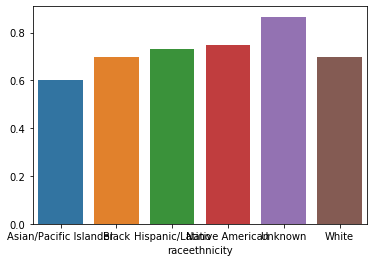

In [24]:
sns.barplot(percentageArmed.index, percentageArmed.values)

<b>Find ratio of unarmed to total to find % unarmed, the inverse of armed

In [25]:
percentageUnarmed = unarmedRace/race
percentageUnarmed

raceethnicity
Asian/Pacific Islander    0.400000
Black                     0.296296
Hispanic/Latino           0.253731
Native American           0.250000
Unknown                   0.133333
White                     0.300847
Name: name, dtype: float64

### No major difference in rate of unarmed deaths by race

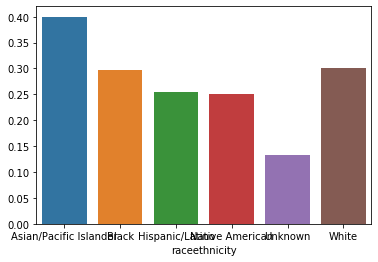

In [26]:
sns.barplot(percentageUnarmed.index, percentageUnarmed.values)

## Are more unarmed Black people killed where there is a larger share_white in the pop?

Create unarmedBlack dataframe and sum the number of records where the white population is greater than the black

In [27]:
unarmedBlack = df2[(df2.raceethnicity=='Black') & (df2.armed==0)]
unarmedBlackminority=(unarmedBlack.share_white > unarmedBlack.share_black).sum()
unarmedBlackminority

18

Total number of unarmed black people in dataset

In [28]:
len(unarmedBlack)

40

<b>There is no major correlation between populations with larger white communities
and police killings of unarmed black men.</b><br>
In other words, the dataset refutes the idea of community prejudice.<br>
It is worth nothing that this was simply for populations where share_white > share_black, which is a fairly relaxed condition and doesnt indicate a heavy majority of share_white, such as 75% or greater

In [29]:
unarmedBlackminority/len(unarmedBlack)

0.45

### Do some states have more police killings relative to population? (Useful for comparison to hate_crimes)

Count number of killings per state

In [30]:
countStateKillings = df2.groupby('state')['name'].count()
countStateKillings.sort_values(ascending=False).nlargest(10)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
WA    11
Name: name, dtype: int64

Average the tract level population for each state, granting a rough indicator of population

In [31]:
statePop=df2.groupby('state')['pop'].mean()
statePop.sort_values(ascending=False).nlargest(10)

state
DE    9020.500000
WY    8988.000000
ID    7426.250000
UT    6884.400000
FL    6108.620690
NJ    5847.636364
MS    5707.666667
MT    5551.000000
GA    5511.687500
NM    5273.200000
Name: pop, dtype: float64

## Compare number of killings to population

Killings/Pop - indicates that a larger ratio has more killings relative to population

In [32]:
(countStateKillings/statePop).sort_values(ascending=False).nlargest(10)

state
CA    0.014681
TX    0.008748
AZ    0.005596
OK    0.005591
FL    0.004747
LA    0.004168
IL    0.003255
OH    0.002970
CO    0.002925
MD    0.002914
dtype: float64

<b>This comparison is in question because of the validity of tract population as a means of analyzing number of killings in respect to population</b>

# Hate Crime Analysis

In [33]:
df.head(5)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,AL,42278,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.806410
1,AK,67629,0.064,0.63,0.914,0.04,0.06,0.42,0.53,0.143740,1.656700
2,AZ,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
3,AR,44922,0.052,0.69,0.824,0.04,0.12,0.26,0.60,0.069061,0.869209
4,CA,60487,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.255805,2.397986


<b>Store the average hate crime rate across all states as a good indicator of white states have an above average rate of hate crimes

In [34]:
averageHateCrime = df['avg_hatecrimes_per_100k_fbi'].mean()
averageHateCrime

2.36761300684

### Display states where the hate crime rate is above average

In [35]:
hateCrimeStates = df[df.avg_hatecrimes_per_100k_fbi > averageHateCrime]\
.sort_values(by='avg_hatecrimes_per_100k_fbi', ascending=False)

In [36]:
hateCrimeStates[['state','share_population_with_high_school_degree',\
'share_non_white','share_voters_voted_trump','avg_hatecrimes_per_100k_fbi']]

,state,share_population_with_high_school_degree,share_non_white,share_voters_voted_trump,avg_hatecrimes_per_100k_fbi
8,DC,0.871,0.63,0.04,10.953480
21,MA,0.890,0.27,0.34,4.801899
34,ND,0.901,0.15,0.64,4.741070
30,NJ,0.874,0.44,0.42,4.413203
17,KY,0.817,0.15,0.63,4.207890
47,WA,0.897,0.31,0.38,3.817740
6,CT,0.886,0.30,0.41,3.772701
23,MN,0.915,0.18,0.45,3.612412
2,AZ,0.842,0.49,0.50,3.413928
37,OR,0.891,0.26,0.41,3.394886


In [37]:
len(hateCrimeStates)

21

### Do Republican/Trump majority vote states have a larger hate crime rate?

In [38]:
hateCrimeTrumpStates = hateCrimeStates[['state','avg_hatecrimes_per_100k_fbi',\
'share_voters_voted_trump']][hateCrimeStates.share_voters_voted_trump > 0.5]

In [39]:
len(hateCrimeTrumpStates)

7

### Only 1/3 of the 21 states with above average hate crime rates had Trump majority votes

In [40]:
len(hateCrimeTrumpStates)/len(hateCrimeStates)

0.3333333333333333

<b> Look at the 10 worst "hate crime" states

In [41]:
top10=hateCrimeStates[['state','avg_hatecrimes_per_100k_fbi',\
'share_voters_voted_trump']].sort_values(by='avg_hatecrimes_per_100k_fbi', ascending=False).head(10)
top10

,state,avg_hatecrimes_per_100k_fbi,share_voters_voted_trump
8,DC,10.953480,0.04
21,MA,4.801899,0.34
34,ND,4.741070,0.64
30,NJ,4.413203,0.42
17,KY,4.207890,0.63
47,WA,3.817740,0.38
6,CT,3.772701,0.41
23,MN,3.612412,0.45
2,AZ,3.413928,0.50
37,OR,3.394886,0.41


In [42]:
top10[top10.share_voters_voted_trump>0.5]

,state,avg_hatecrimes_per_100k_fbi,share_voters_voted_trump
34,ND,4.74107,0.64
17,KY,4.20789,0.63


In [43]:
len(top10[top10.share_voters_voted_trump>0.5])/len(top10)

0.2

In [44]:
top10['Trump']=(top10.share_voters_voted_trump>0.5)

In [45]:
top10.head()

,state,avg_hatecrimes_per_100k_fbi,share_voters_voted_trump,Trump
8,DC,10.953480,0.04,False
21,MA,4.801899,0.34,False
34,ND,4.741070,0.64,True
30,NJ,4.413203,0.42,False
17,KY,4.207890,0.63,True


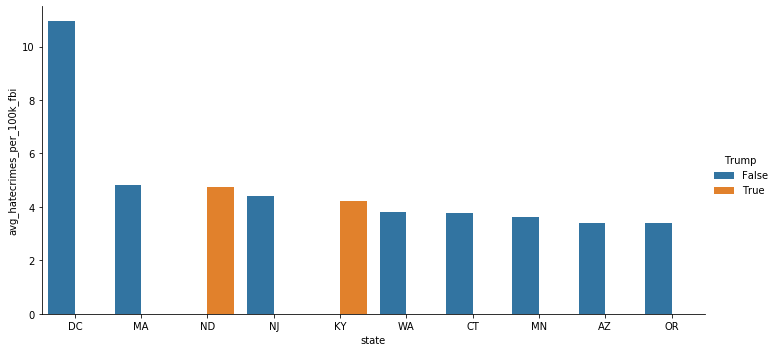

In [46]:
sns.catplot(y='avg_hatecrimes_per_100k_fbi', data=top10, x='state', aspect=2, kind='bar',hue='Trump')

### 2 out of the 10 states with largest number of hate crimes were Trump states
### There were fewer hate crimes in 'Trump' states years 2010-2015 compared to 'Non-Trump' states

### Analyze 2016 data to see if there was a change from 2010-2015 

In [47]:
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,AL,42278,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.806410
1,AK,67629,0.064,0.63,0.914,0.04,0.06,0.42,0.53,0.143740,1.656700
2,AZ,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
3,AR,44922,0.052,0.69,0.824,0.04,0.12,0.26,0.60,0.069061,0.869209
4,CA,60487,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.255805,2.397986


In [48]:
averageHateCrime2016 = df['hate_crimes_per_100k_splc'].mean()
averageHateCrime2016

0.30409296995744683

In [49]:
averageHateCrime

2.36761300684

There was a lower average hate crime rate across states in 2016 than years prior

In [50]:
hateCrimeStates2016 = df[df.hate_crimes_per_100k_splc > averageHateCrime2016]\
.sort_values(by='hate_crimes_per_100k_splc', ascending=False)
hateCrimeStates2016[['state','hate_crimes_per_100k_splc','share_voters_voted_trump']]

,state,hate_crimes_per_100k_splc,share_voters_voted_trump
8,DC,1.522302,0.04
37,OR,0.832850,0.41
47,WA,0.677488,0.38
21,MA,0.630811,0.34
23,MN,0.627480,0.45
19,ME,0.615574,0.45
26,MT,0.495491,0.57
15,IA,0.454427,0.52
22,MI,0.403779,0.48
5,CO,0.390523,0.44


In [51]:
len(hateCrimeStates2016)

18

In [52]:
hateCrimeTrumpStates2016 = hateCrimeStates2016[['state','hate_crimes_per_100k_splc',\
'share_voters_voted_trump']][hateCrimeStates2016.share_voters_voted_trump > 0.5]
hateCrimeTrumpStates2016

,state,hate_crimes_per_100k_splc,share_voters_voted_trump
26,MT,0.495491,0.57
15,IA,0.454427,0.52
48,WV,0.328677,0.69
17,KY,0.324397,0.63


In [53]:
len(hateCrimeTrumpStates)/len(hateCrimeStates2016)

0.3888888888888889

### 39% of hate crime states in 2016 had a Trump majority, a slight increase from 2010-2015 averages but still lower than 50%, no correlation to hate crimes

## Do states with a lower median income have a greater hate crime rate?

Find average median household income across all states as an indicator of the 'poorer' states

In [54]:
averageIncome=df.median_household_income.mean()
averageIncome

55223.60784313725

In [55]:
hateCrimeStates[['state','median_household_income','avg_hatecrimes_per_100k_fbi']]

,state,median_household_income,avg_hatecrimes_per_100k_fbi
8,DC,68277,10.953480
21,MA,63151,4.801899
34,ND,60730,4.741070
30,NJ,65243,4.413203
17,KY,42786,4.207890
47,WA,59068,3.817740
6,CT,70161,3.772701
23,MN,67244,3.612412
2,AZ,49254,3.413928
37,OR,58875,3.394886


In [56]:
len(hateCrimeStates)

21

<b> Filter hateCrimeStates by those with below average median_household_income to see % of total

In [57]:
lowIncome_hateCrimeStates=hateCrimeStates[hateCrimeStates.median_household_income < averageIncome]
lowIncome_hateCrimeStates

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
17,KY,42786,0.050,0.56,0.817,0.03,0.17,0.15,0.63,0.324397,4.207890
2,AZ,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
41,SD,53053,0.035,0.51,0.899,NaN,0.08,0.17,0.62,NaN,3.301737
35,OH,49644,0.045,0.75,0.876,0.03,0.10,0.21,0.52,0.190714,3.240420
22,MI,52005,0.050,0.87,0.879,0.04,0.09,0.24,0.48,0.403779,3.200442
42,TN,43716,0.057,0.82,0.831,0.04,0.13,0.27,0.61,0.199938,3.136051
32,NY,54310,0.051,0.94,0.847,0.10,0.10,0.42,0.37,0.350620,3.102164
26,MT,51102,0.041,0.34,0.908,0.01,0.10,0.10,0.57,0.495491,2.954959
19,ME,51710,0.044,0.54,0.902,NaN,0.12,0.09,0.45,0.615574,2.626611


In [58]:
len(lowIncome_hateCrimeStates)/len(hateCrimeStates)

0.42857142857142855

### Only 43% of hateCrimeStates are below average median income, no correlation

In [59]:
df.corr()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.302288,-0.818045,0.103775,-0.597528,0.350714,0.318246
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.278899,0.209440,0.431847,-0.148192,0.083292,0.073936
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.547672,-0.570695,0.162217,0.209827
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.434846,-0.155656,0.308944,0.164148
share_non_citizen,0.302288,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.733655,-0.631194,0.243507,0.300892
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.389718,1.000000,-0.269449,0.552849,-0.286170,-0.260094
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.733655,-0.269449,1.000000,-0.488838,0.047561,0.083525
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.488838,1.000000,-0.657067,-0.504532
hate_crimes_per_100k_splc,0.350714,0.083292,0.162217,0.308944,0.243507,-0.286170,0.047561,-0.657067,1.000000,0.758700
avg_hatecrimes_per_100k_fbi,0.318246,0.073936,0.209827,0.164148,0.300892,-0.260094,0.083525,-0.504532,0.758700,1.000000


## Do states with a larger non citizen % have a greater hate crime rate?

In [60]:
averageNonCitizen=df.share_non_citizen.mean()
averageNonCitizen

0.054583333333333324

<b> Filter hateCrimeStates by those with above average share_non_citizen to see % of total

In [61]:
highNonCitizen_hateCrimeStates=hateCrimeStates[hateCrimeStates.share_non_citizen > averageNonCitizen]
highNonCitizen_hateCrimeStates

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
8,DC,68277,0.067,1.00,0.871,0.11,0.04,0.63,0.04,1.522302,10.953480
21,MA,63151,0.046,0.97,0.890,0.09,0.08,0.27,0.34,0.630811,4.801899
30,NJ,65243,0.056,1.00,0.874,0.11,0.07,0.44,0.42,0.078306,4.413203
47,WA,59068,0.052,0.86,0.897,0.08,0.09,0.31,0.38,0.677488,3.817740
6,CT,70161,0.052,0.94,0.886,0.06,0.06,0.30,0.41,0.335392,3.772701
2,AZ,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
37,OR,58875,0.062,0.87,0.891,0.07,0.10,0.26,0.41,0.832850,3.394886
32,NY,54310,0.051,0.94,0.847,0.10,0.10,0.42,0.37,0.350620,3.102164
5,CO,60940,0.040,0.80,0.893,0.06,0.07,0.31,0.44,0.390523,2.804689
4,CA,60487,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.255805,2.397986


In [62]:
len(highNonCitizen_hateCrimeStates)/len(hateCrimeStates)

0.47619047619047616

### Only 47.6% of hateCrimeStates have average % of noncitizens, no major correlation

## -------------------------------------------------------------------------------------------------------

# Join police_killings and hate_crimes

In [63]:
len(df2.state.unique())

47

47 out of 50 states feature records in police_killings, will do an inner merge

In [64]:
df_inner = df2.merge(df, left_on='state',right_on='state')
df_inner.head()

,name,age,gender,raceethnicity,state,armed,pop,share_white,share_black,share_hispanic,...,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,A'donte Washington,16,Male,Black,AL,0,3779,60.5,30.5,5.6,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
1,Anthony Briggs,36,Male,Black,AL,1,6018,89.9,4.3,1.4,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
2,Douglas Harris,77,Male,Black,AL,0,3708,22.2,77.8,1.5,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
3,Fletcher Stewart,46,Male,White,AL,1,4720,66.2,30.9,0.1,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
4,Gilbert Fleury,54,Male,White,AL,1,6971,82.8,15,0.4,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641


## Are hate crimes and police killings correlated? (number of police killings in states with high hate crimes)

<b>Group by states with above average hate crime rate and count # of police killings

In [65]:
killingsInHCStates=df_inner[df_inner.avg_hatecrimes_per_100k_fbi>averageHateCrime].groupby('state')['name'].count()
killingsInHCStates.sort_values(ascending = False)

state
CA    74
AZ    25
NY    14
CO    12
NJ    11
WA    11
OH    10
MI     9
OR     8
KY     7
NE     6
TN     6
MN     6
UT     5
MA     5
MT     2
ME     1
DC     1
CT     1
Name: name, dtype: int64

In [66]:
sum(killingsInHCStates)

214

Compare to total # of police killings

In [67]:
df_inner.groupby('state')['name'].count().sort_values(ascending = False)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
WA    11
IL    11
LA    11
MD    10
MO    10
NC    10
OH    10
SC     9
VA     9
MI     9
AL     8
IN     8
OR     8
KY     7
PA     7
TN     6
KS     6
MN     6
MS     6
NE     6
MA     5
UT     5
WI     5
NM     5
AR     4
ID     4
HI     4
NV     3
DE     2
AK     2
IA     2
WV     2
MT     2
DC     1
CT     1
ME     1
NH     1
WY     1
Name: name, dtype: int64

In [68]:
len(df_inner)

467

In [69]:
sum(killingsInHCStates)/len(df_inner)

0.4582441113490364

### Less than half (45.8%) of police killings are in states with high hate crime rates, no major correlation between hate crime and # of police killings

### Are there more police killings in Trump states?
Similar to hate_crimes for Trump states, group by state, count killings, and filter by share_voters_voted_trump<br>

In [70]:
killingsInTrumpStates=df_inner[df_inner.share_voters_voted_trump>0.5].groupby('state')['name'].count()
killingsInTrumpStates.sort_values(ascending = False)

state
TX    46
OK    22
GA    16
LA    11
MO    10
OH    10
NC    10
SC     9
AL     8
IN     8
KY     7
NE     6
MS     6
TN     6
KS     6
AR     4
ID     4
AK     2
IA     2
WV     2
MT     2
WY     1
Name: name, dtype: int64

In [71]:
killingsInTrumpStates.sum()

198

In [72]:
killingsInTrumpStates.sum()/len(df_inner)

0.42398286937901497

### Less than half (42.4%) of police killings are in states with a Trump majority vote, similar to hate crimes. There is no correlation between a Trump majority vote and police killings or hate crimes, in fact there are negative correlations

In [73]:
df_inner.head()

,name,age,gender,raceethnicity,state,armed,pop,share_white,share_black,share_hispanic,...,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,A'donte Washington,16,Male,Black,AL,0,3779,60.5,30.5,5.6,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
1,Anthony Briggs,36,Male,Black,AL,1,6018,89.9,4.3,1.4,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
2,Douglas Harris,77,Male,Black,AL,0,3708,22.2,77.8,1.5,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
3,Fletcher Stewart,46,Male,White,AL,1,4720,66.2,30.9,0.1,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
4,Gilbert Fleury,54,Male,White,AL,1,6971,82.8,15,0.4,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641


<b> Analyze the 10 states with largest # of police killings and see how many were 'Trump' states

In [74]:
top10Killings=df_inner.groupby('state')['name'].count().sort_values(ascending = False).nlargest(10)
top10Killings

state
CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
WA    11
Name: name, dtype: int64

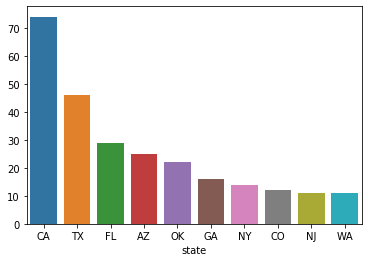

In [75]:
sns.barplot(top10Killings.index, top10Killings.values)

<b>Among the 10 states with largest # of killings, only TX,OK, and GA had a Trump majority vote

<b> Additional view to observe unrelated nature of hate crimes and police killings

In [76]:
stateInfo =df_inner.groupby('state')['avg_hatecrimes_per_100k_fbi'].agg(['mean','count']).rename(columns=\
        {'mean':'HateCrimeRate', 'count':'NumKillings'}).sort_values(by=\
        ['HateCrimeRate','NumKillings'],ascending= [False,False])
stateInfo.head(10)

,HateCrimeRate,NumKillings
state,,
DC,10.953480,1
MA,4.801899,5
NJ,4.413203,11
KY,4.207890,7
WA,3.817740,11
CT,3.772701,1
MN,3.612412,6
AZ,3.413928,25
OR,3.394886,8


In [77]:
stateInfo.corr()

,HateCrimeRate,NumKillings
HateCrimeRate,1.000000,-0.131661
NumKillings,-0.131661,1.000000


## -------------------------------------------------------------------------------------------------------

# Clustering

<b>Attempted cluster of the joined datasets

In [78]:
df_inner.head()

,name,age,gender,raceethnicity,state,armed,pop,share_white,share_black,share_hispanic,...,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,A'donte Washington,16,Male,Black,AL,0,3779,60.5,30.5,5.6,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
1,Anthony Briggs,36,Male,Black,AL,1,6018,89.9,4.3,1.4,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
2,Douglas Harris,77,Male,Black,AL,0,3708,22.2,77.8,1.5,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
3,Fletcher Stewart,46,Male,White,AL,1,4720,66.2,30.9,0.1,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641
4,Gilbert Fleury,54,Male,White,AL,1,6971,82.8,15,0.4,...,42278,0.06,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.80641


In [79]:
dfCluster = df_inner.copy()

In [80]:
dfCluster = pd.get_dummies(columns=['raceethnicity'],data=dfCluster)

In [81]:
dfCluster = pd.get_dummies(columns=['gender'],data=dfCluster)

In [82]:
dfCluster.drop(['raceethnicity_Unknown','hate_crimes_per_100k_splc','name',\
               'raceethnicity_Asian/Pacific Islander','state',\
              'raceethnicity_Native American','share_unemployed_seasonal']\
              ,axis=1,inplace=True)

In [83]:
#household income and county income are less accurate than median_household_income
#nat_bucket and share_non_citizen arent relevant
dfCluster.drop(['h_income','nat_bucket','share_non_citizen','county_income'],axis=1,inplace=True)

In [84]:
dfCluster.drop(['college','share_population_with_high_school_degree',\
                'share_white_poverty','raceethnicity_Hispanic/Latino',\
               'gender_Female','gender_Male','share_non_white'],axis=1,inplace=True)

<b> Additional data cleaning to remove non-numerical values and NaN

In [85]:
dfCluster = dfCluster[dfCluster.age != 'Unknown']
dfCluster = dfCluster[dfCluster.pov != '-']
dfCluster = dfCluster[dfCluster.armed != 'Disputed']

In [86]:
from sklearn.cluster import KMeans

In [87]:
clu = KMeans(n_clusters=2, random_state=0)

In [88]:
#fill remaining NA values with mean
urate_mean = dfCluster.urate.mean()
dfCluster.urate.fillna(urate_mean, inplace=True)

hc_mean = dfCluster.avg_hatecrimes_per_100k_fbi.mean()
dfCluster.avg_hatecrimes_per_100k_fbi.fillna(hc_mean, inplace=True)

In [89]:
clu.fit(dfCluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [90]:
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [91]:
dfC = dfCluster.copy()
dfC['cluster']=clu.labels_

In [92]:
dfC.groupby('cluster').mean()

,pop,urate,median_household_income,share_population_in_metro_areas,share_voters_voted_trump,avg_hatecrimes_per_100k_fbi,raceethnicity_Black,raceethnicity_White
cluster,,,,,,,,
0,4742.167273,0.117246,48918.243636,0.808582,0.527345,1.663375,0.294545,0.556364
1,4828.962162,0.118587,62133.459459,0.886595,0.395730,2.628553,0.281081,0.443243


In [93]:
len(clu.labels_[clu.labels_==0])

275

In [94]:
len(clu.labels_[clu.labels_==1])

185

In [95]:
len(clu.labels_[clu.labels_==0])/len(clu.labels_)

0.5978260869565217

<b>This cluster shows more killings occured in states with lower household income and a larger trump vote but with lower average hate crimes

<b> The componenet of Trump states having more police killings contradics our more direct analysis

# Clustering of hate_crimes

In [96]:
dfHC = df.copy()

In [97]:
dfHC.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,AL,42278,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.125839,1.806410
1,AK,67629,0.064,0.63,0.914,0.04,0.06,0.42,0.53,0.143740,1.656700
2,AZ,49254,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.225320,3.413928
3,AR,44922,0.052,0.69,0.824,0.04,0.12,0.26,0.60,0.069061,0.869209
4,CA,60487,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.255805,2.397986


In [98]:
dfHC.drop(['share_unemployed_seasonal','hate_crimes_per_100k_splc'],axis=1,inplace=True)

In [99]:
dfHC.drop(['share_non_citizen'],axis=1,inplace=True)

In [100]:
dfHC.drop('state',axis=1,inplace=True)

In [101]:
hc_mean = dfHC.avg_hatecrimes_per_100k_fbi.mean()
dfHC.avg_hatecrimes_per_100k_fbi.fillna(hc_mean, inplace=True)

In [102]:
clu2 = KMeans(n_clusters=3, random_state=0)

In [103]:
clu2.fit(dfHC)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [104]:
clu2.labels_

array([2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 0, 0], dtype=int32)

In [105]:
dfC2 = dfHC.copy()
dfC2['cluster']=clu2.labels_

In [106]:
dfC2.groupby('cluster').mean()

,median_household_income,share_population_in_metro_areas,share_population_with_high_school_degree,share_white_poverty,share_non_white,share_voters_voted_trump,avg_hatecrimes_per_100k_fbi
cluster,,,,,,,
0,56307.347826,0.715652,0.881435,0.089565,0.255652,0.490435,2.165497
1,68366.181818,0.850909,0.893364,0.063636,0.382727,0.384545,3.556151
2,45253.352941,0.731765,0.836765,0.112941,0.353529,0.557647,1.872010


<b>Highest income states - most hate crimes, lower trump vote, larger metro areas

<b> Lowest income states - lowest hate crimes, highest trump vote, more rural

In [107]:
df.corr()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.302288,-0.818045,0.103775,-0.597528,0.350714,0.318246
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.278899,0.209440,0.431847,-0.148192,0.083292,0.073936
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.547672,-0.570695,0.162217,0.209827
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.434846,-0.155656,0.308944,0.164148
share_non_citizen,0.302288,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.733655,-0.631194,0.243507,0.300892
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.389718,1.000000,-0.269449,0.552849,-0.286170,-0.260094
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.733655,-0.269449,1.000000,-0.488838,0.047561,0.083525
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.488838,1.000000,-0.657067,-0.504532
hate_crimes_per_100k_splc,0.350714,0.083292,0.162217,0.308944,0.243507,-0.286170,0.047561,-0.657067,1.000000,0.758700
avg_hatecrimes_per_100k_fbi,0.318246,0.073936,0.209827,0.164148,0.300892,-0.260094,0.083525,-0.504532,0.758700,1.000000


# Visualize political party and hate crime averages

In [108]:
df['Trump_majority_vote']= df.share_voters_voted_trump >0.5

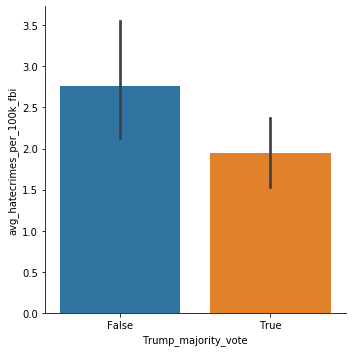

In [109]:
sns.catplot(x='Trump_majority_vote',y='avg_hatecrimes_per_100k_fbi',data=df, kind='bar')

In [110]:
df.median_household_income.mean()

55223.60784313725

# Visualize high income states and hate crime averages

In [111]:
df['high_income_state']= df.median_household_income >60000

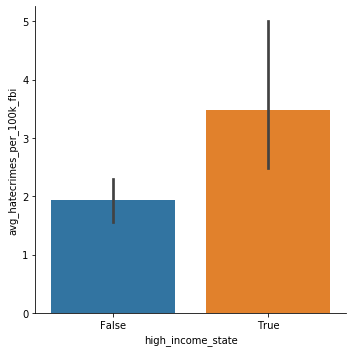

In [112]:
sns.catplot(x='high_income_state',y='avg_hatecrimes_per_100k_fbi',data=df, kind='bar')

# Visualize political party and median income levels

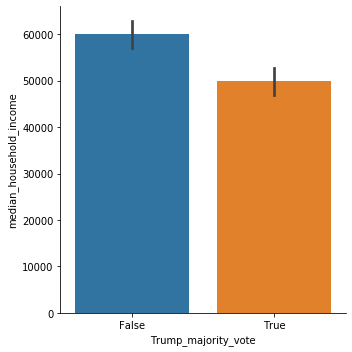

In [113]:
sns.catplot(x='Trump_majority_vote',y='median_household_income',data=df, kind='bar')

# Clustering of police_killings

In [114]:
dfPK = df2.copy()

In [115]:
dfPK.head()

,name,age,gender,raceethnicity,state,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,AL,0,3779,60.5,30.5,5.6,51367.0,54766,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,LA,0,2769,53.8,36.2,0.5,27972.0,40930,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,WI,0,4079,73.8,7.7,16.8,45365.0,54930,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,CA,1,4343,1.2,0.6,98.8,48295.0,55909,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,OH,0,6809,92.5,1.4,1.7,68785.0,49669,4.0,1.9,0.063550,0.403954


In [116]:
dfPK = pd.get_dummies(columns=['raceethnicity'],data=dfPK)
dfPK = pd.get_dummies(columns=['gender'],data=dfPK)

In [117]:
dfPK.head()

,name,age,state,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,...,urate,college,raceethnicity_Asian/Pacific Islander,raceethnicity_Black,raceethnicity_Hispanic/Latino,raceethnicity_Native American,raceethnicity_Unknown,raceethnicity_White,gender_Female,gender_Male
0,A'donte Washington,16,AL,0,3779,60.5,30.5,5.6,51367.0,54766,...,0.097686,0.168510,0,1,0,0,0,0,0,1
1,Aaron Rutledge,27,LA,0,2769,53.8,36.2,0.5,27972.0,40930,...,0.065724,0.111402,0,0,0,0,0,1,0,1
2,Aaron Siler,26,WI,0,4079,73.8,7.7,16.8,45365.0,54930,...,0.166293,0.147312,0,0,0,0,0,1,0,1
3,Aaron Valdez,25,CA,1,4343,1.2,0.6,98.8,48295.0,55909,...,0.124827,0.050133,0,0,1,0,0,0,0,1
4,Adam Jovicic,29,OH,0,6809,92.5,1.4,1.7,68785.0,49669,...,0.063550,0.403954,0,0,0,0,0,1,0,1


In [118]:
dfPK.drop(['raceethnicity_Unknown','name',
               'raceethnicity_Asian/Pacific Islander','state',
              'raceethnicity_Native American',
               'gender_Female','raceethnicity_Hispanic/Latino','share_hispanic','nat_bucket']
              ,axis=1,inplace=True)

In [119]:
dfPK.head()

,age,armed,pop,share_white,share_black,h_income,county_income,pov,urate,college,raceethnicity_Black,raceethnicity_White,gender_Male
0,16,0,3779,60.5,30.5,51367.0,54766,14.1,0.097686,0.168510,1,0,1
1,27,0,2769,53.8,36.2,27972.0,40930,28.8,0.065724,0.111402,0,1,1
2,26,0,4079,73.8,7.7,45365.0,54930,14.6,0.166293,0.147312,0,1,1
3,25,1,4343,1.2,0.6,48295.0,55909,11.7,0.124827,0.050133,0,0,1
4,29,0,6809,92.5,1.4,68785.0,49669,1.9,0.063550,0.403954,0,1,1


In [120]:
dfPK.corr()

,pop,h_income,county_income,urate,college,raceethnicity_Black,raceethnicity_White,gender_Male
pop,1.000000,0.304894,0.137411,-0.223491,0.106512,-0.153333,0.124855,0.015577
h_income,0.304894,1.000000,0.468599,-0.509907,0.669577,-0.124132,0.158537,-0.093748
county_income,0.137411,0.468599,1.000000,-0.183174,0.342686,0.081570,-0.127392,-0.159246
urate,-0.223491,-0.509907,-0.183174,1.000000,-0.458622,0.249441,-0.245443,0.018548
college,0.106512,0.669577,0.342686,-0.458622,1.000000,-0.008476,0.096483,-0.096520
raceethnicity_Black,-0.153333,-0.124132,0.081570,0.249441,-0.008476,1.000000,-0.644537,-0.014274
raceethnicity_White,0.124855,0.158537,-0.127392,-0.245443,0.096483,-0.644537,1.000000,0.002381
gender_Male,0.015577,-0.093748,-0.159246,0.018548,-0.096520,-0.014274,0.002381,1.000000


In [121]:
dfPK.drop(['county_income','gender_Male'],axis=1,inplace=True)

In [122]:
clu3 = KMeans(n_clusters=3, random_state=0)

In [123]:
dfPK = dfPK[dfPK.age != 'Unknown']
dfPK = dfPK[dfPK.pov != '-']
dfPK = dfPK[dfPK.armed != 'Disputed']

In [124]:
#fill remaining NA values with mean
urate_mean = dfPK.urate.mean()
dfPK.urate.fillna(urate_mean, inplace=True)

college_mean = dfPK.college.mean()
dfPK.college.fillna(college_mean, inplace=True)

In [125]:
clu3.fit(dfPK)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [126]:
dfPK['cluster']=clu3.labels_

In [127]:
dfPK.groupby('cluster').mean()

,pop,h_income,urate,college,raceethnicity_Black,raceethnicity_White
cluster,,,,,,
0,4225.377049,32104.012295,0.144684,0.153122,0.340164,0.438525
1,5194.308989,56044.241573,0.091852,0.256548,0.224719,0.595506
2,6365.131579,95319.500000,0.066541,0.495585,0.263158,0.578947


<b>Relatively more black police killings occured in low income, low education, and high unemployment areas

<b>Relatively more white police killings occured in higher income, high college educated, and low unemployement college educated areas

In [128]:
len(clu3.labels_[clu3.labels_==0])

244

In [129]:
len(clu3.labels_)

460

In [130]:
len(clu3.labels_[clu3.labels_==0])/len(clu3.labels_)

0.5304347826086957

<b> Cluster 0 with the lowest average income and largest percentage of black people makes up 53% of the entire cluster

In [131]:
dfPK.head()

,age,armed,pop,share_white,share_black,h_income,pov,urate,college,raceethnicity_Black,raceethnicity_White,cluster
0,16,0,3779,60.5,30.5,51367.0,14.1,0.097686,0.168510,1,0,1
1,27,0,2769,53.8,36.2,27972.0,28.8,0.065724,0.111402,0,1,0
2,26,0,4079,73.8,7.7,45365.0,14.6,0.166293,0.147312,0,1,1
3,25,1,4343,1.2,0.6,48295.0,11.7,0.124827,0.050133,0,0,1
4,29,0,6809,92.5,1.4,68785.0,1.9,0.063550,0.403954,0,1,1


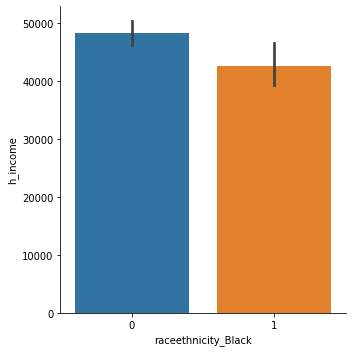

In [132]:
sns.catplot(x='raceethnicity_Black',y='h_income',data=dfPK, kind='bar')

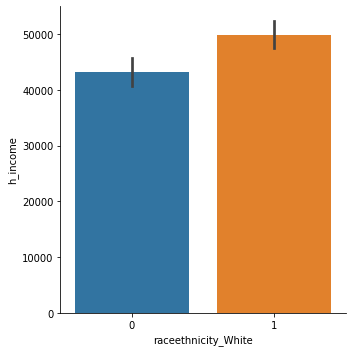

In [133]:
sns.catplot(x='raceethnicity_White',y='h_income',data=dfPK, kind='bar')

<b> Write cleaned datasets to new csv

In [134]:
df.to_csv('cleaned_hate_crimes.csv')

In [135]:
df_inner.to_csv('joined_dfs.csv')

In [136]:
df2.to_csv('cleaned_police_killings.csv')